In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Chargement et Inspection des Données
# Chargement du fichier avec le bon chemin
df = pd.read_csv('./WEEK_2/DAY_4/DATASET/2019.csv')

# Affichage des informations sur le dataset
print("Aperçu du dataset :")
print(df.info())
print("\nPremières lignes :")
print(df.head())
print("\nStatistiques descriptives :")
print(df.describe())

Aperçu du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None

Premières lignes :
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340       

In [3]:
# 2. Prétraitement des Données
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())


Valeurs manquantes par colonne :
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


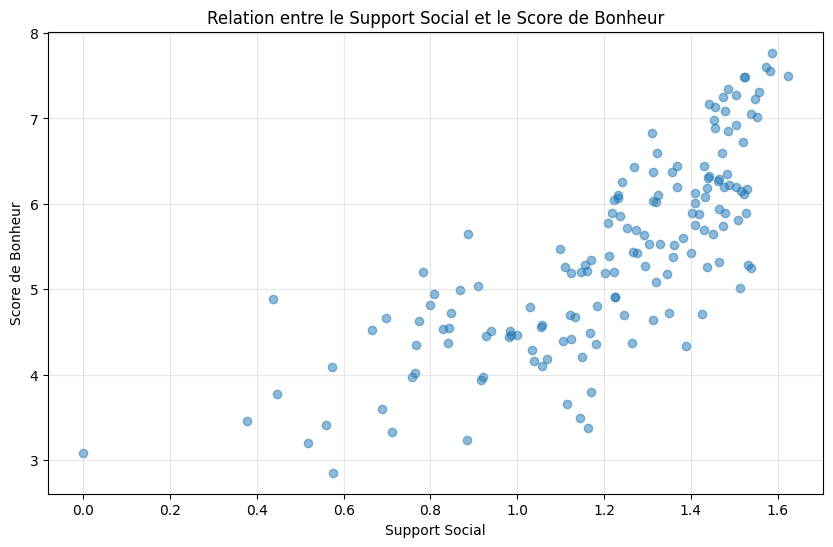

In [4]:
# 3. Relation entre Support Social et Score de Bonheur
plt.figure(figsize=(10, 6))
plt.scatter(df['Social support'], df['Score'], alpha=0.5)
plt.title('Relation entre le Support Social et le Score de Bonheur')
plt.xlabel('Support Social')
plt.ylabel('Score de Bonheur')
plt.grid(True, alpha=0.3)

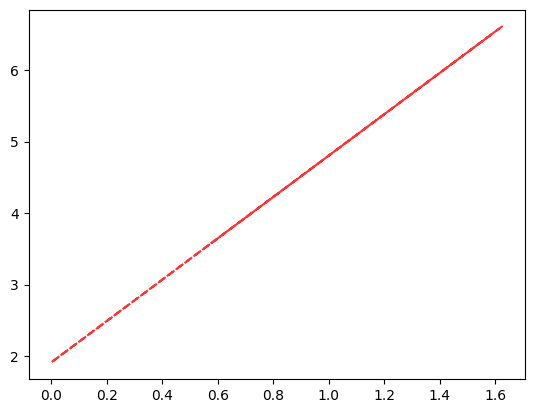

In [5]:
# Ajout d'une ligne de régression
z = np.polyfit(df['Social support'], df['Score'], 1)
p = np.poly1d(z)
plt.plot(df['Social support'], p(df['Social support']), "r--", alpha=0.8)

plt.show()

In [9]:
# 3. Pour la comparaison régionale, nous allons d'abord créer des régions
# On peut regrouper les pays par continents ou zones géographiques
# Créons un dictionnaire pour mapper les pays à leurs régions
regions = {
    'Western Europe': ['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland', 'Sweden', 'Austria', 'United Kingdom', 'Germany'],
    'North America': ['Canada', 'United States'],
    'Asia': ['Japan', 'South Korea', 'Taiwan', 'Singapore', 'Thailand', 'China', 'Vietnam'],
    'Africa': ['South Africa', 'Nigeria', 'Kenya', 'Uganda', 'Tanzania'],
    'Latin America': ['Costa Rica', 'Brazil', 'Mexico', 'Chile', 'Argentina', 'Colombia']
}

# Création d'une nouvelle colonne 'Region'
df['Region'] = df['Country or region'].map({country: region 
                                          for region, countries in regions.items() 
                                          for country in countries})


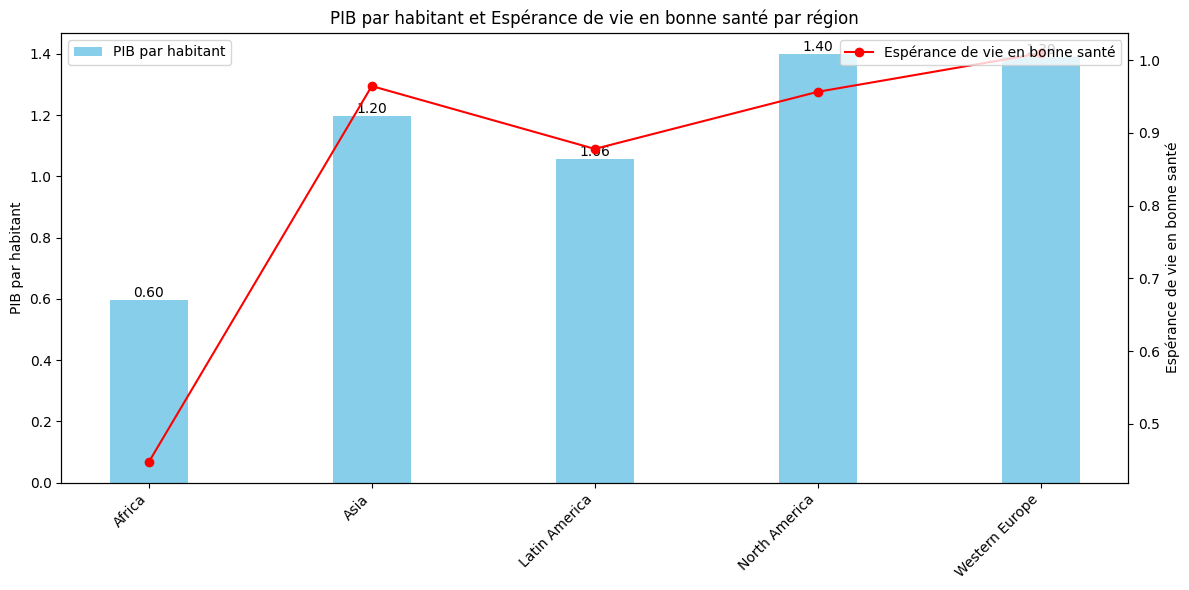


Statistiques par région :
                GDP per capita  Healthy life expectancy
Region                                                 
Africa                   0.595                    0.447
Asia                     1.198                    0.964
Latin America            1.057                    0.878
North America            1.399                    0.956
Western Europe           1.391                    1.010


In [10]:
# 4. Comparaisons Régionales du PIB et de la Santé
# Ne garder que les pays avec une région assignée
df_with_regions = df.dropna(subset=['Region'])

# Calcul des moyennes par région
regional_means = df_with_regions.groupby('Region')[['GDP per capita', 'Healthy life expectancy']].mean()

# Création du subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barres pour le PIB par habitant
x = np.arange(len(regional_means.index))
width = 0.35
bars = ax1.bar(x, regional_means['GDP per capita'], width, label='PIB par habitant', color='skyblue')
ax1.set_ylabel('PIB par habitant')
ax1.set_title('PIB par habitant et Espérance de vie en bonne santé par région')

# Deuxième axe pour l'espérance de vie
ax2 = ax1.twinx()
line = ax2.plot(x, regional_means['Healthy life expectancy'], 'r-', marker='o', label='Espérance de vie en bonne santé')
ax2.set_ylabel('Espérance de vie en bonne santé')

# Personnalisation du graphique
ax1.set_xticks(x)
ax1.set_xticklabels(regional_means.index, rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajout des valeurs sur les barres
for i, v in enumerate(regional_means['GDP per capita']):
    ax1.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Affichage des statistiques
print("\nStatistiques par région :")
print(regional_means.round(3))
